# Data models and analyses techniques: Exercise sheet 1

#### *Your name:* [Please write your name here]

## Introduction

For each lecture there will be a collection of exercises presented as Jupyter notebooks. The exercises should be solved and documented as a mini-project that will form the basis for the examination. When solving the exercises it is therefore important that you 
 * document all relevant results and analyses that you have obtained/performed during the exercises.
 * try to relate your results to the theoretical background of the methods being applied. 

The documentation should be integrated (by adding new code/markdown cells) in the Jupyter notebooks containing the exercise sheets.

The mini-project should be delivered after the last seminar in this module (an exact date will be provided later) and should consist of:
 - a single pdf-file containing all the notebooks; the 'File' menu gives you the option of downloading a pdf-version of your notebook. The name of the file should be [your\_first\_name]_[your\_family\_name].pdf (e.g. Thomas\_Nielsen.pdf).
 - a copy of your notebooks with the solutions to the exercises. The notebooks should be named [your\_first name]\_[your\_family\_name]\_[exercise\_sheet\_number].ipynb (e.g., Thomas\_Nielsen\_1.ipnyb).
 
If you have any questions about the exercises, you are strongly encouraged to post you questions on the MS Teams channel or on the discussion forum on Moodle.

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

# Data source

In this exercise we will play around with the a subset of the Boston housing data set, which is available at `http://lib.stat.cmu.edu/datasets/boston`. The data is unfortunately not available through sklearn, so instead we will have to download and massage it a bit.

In [1]:
import pandas as pd
import requests
from io import StringIO
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

url = 'http://lib.stat.cmu.edu/datasets/boston'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the response as a string and split into lines
    lines = response.text.splitlines()
    meta = "\n".join(lines[0:21])
    
    # Drop lines with meta data
    lines = lines[22:]
    
    # Column names
    col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

    # Join every two lines (rows are broken over two lines)
    combined_lines = []
    for i in range(0, len(lines), 2):
        combined_line = lines[i].strip() + " " + lines[i + 1].strip()
        combined_lines.append(combined_line)

    # Combine all lines into a single string
    s = "\n".join(combined_lines)
    
    # Read into a DataFrame using StringIO
    df = pd.read_csv(StringIO(s), delim_whitespace=True, header=None, names=col_names)

    # Drop column B
    df = df.drop(columns=['B'])    

    data = {}
    data['DESCR'] = meta
    data['target'] = df['MEDV']
    data['data'] = df.drop(columns=['MEDV'])
    data['feature_names'] = data['data']

else:
    print(f"Failed to retrieve data: {response.status_code}")

In [2]:
# The variables in the data set
data['data'].columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [3]:
# ... and the target variable with the median value of owner-occupied homes in $1000's
data['target']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

Let's get a bit acquainted with the data

In [4]:
print(data['DESCR'])

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

Again we treat it as a classification problem:

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
c = np.array([1 if y > np.median(data['target']) else 0 for y in data['target']])
print(c)
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, random_state=0)

[1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 

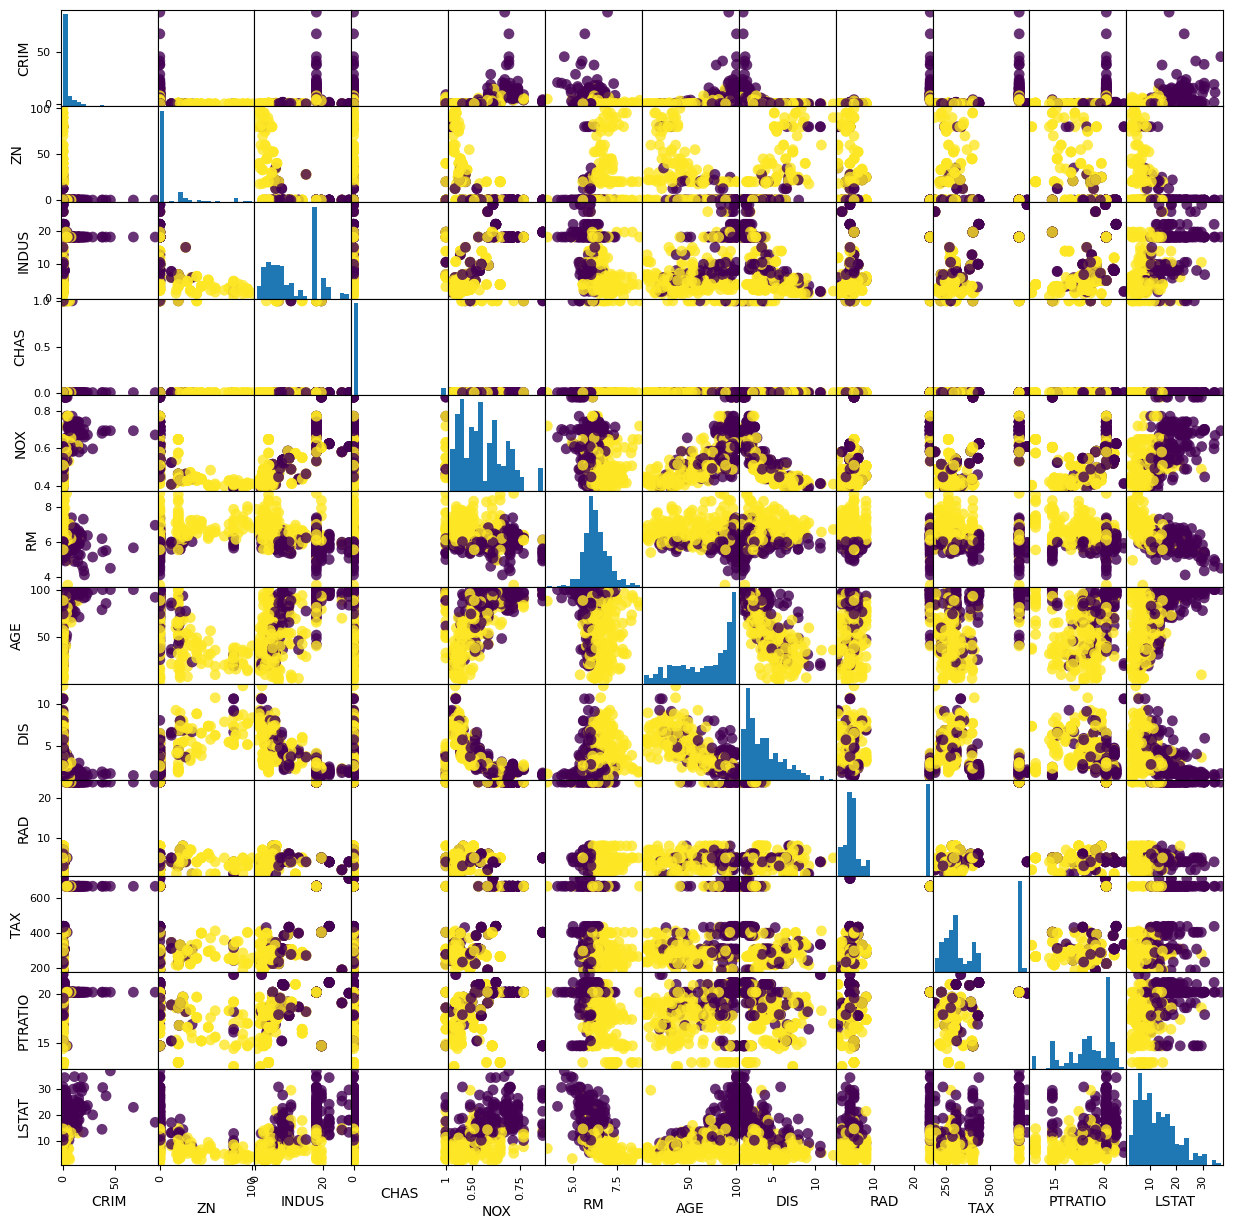

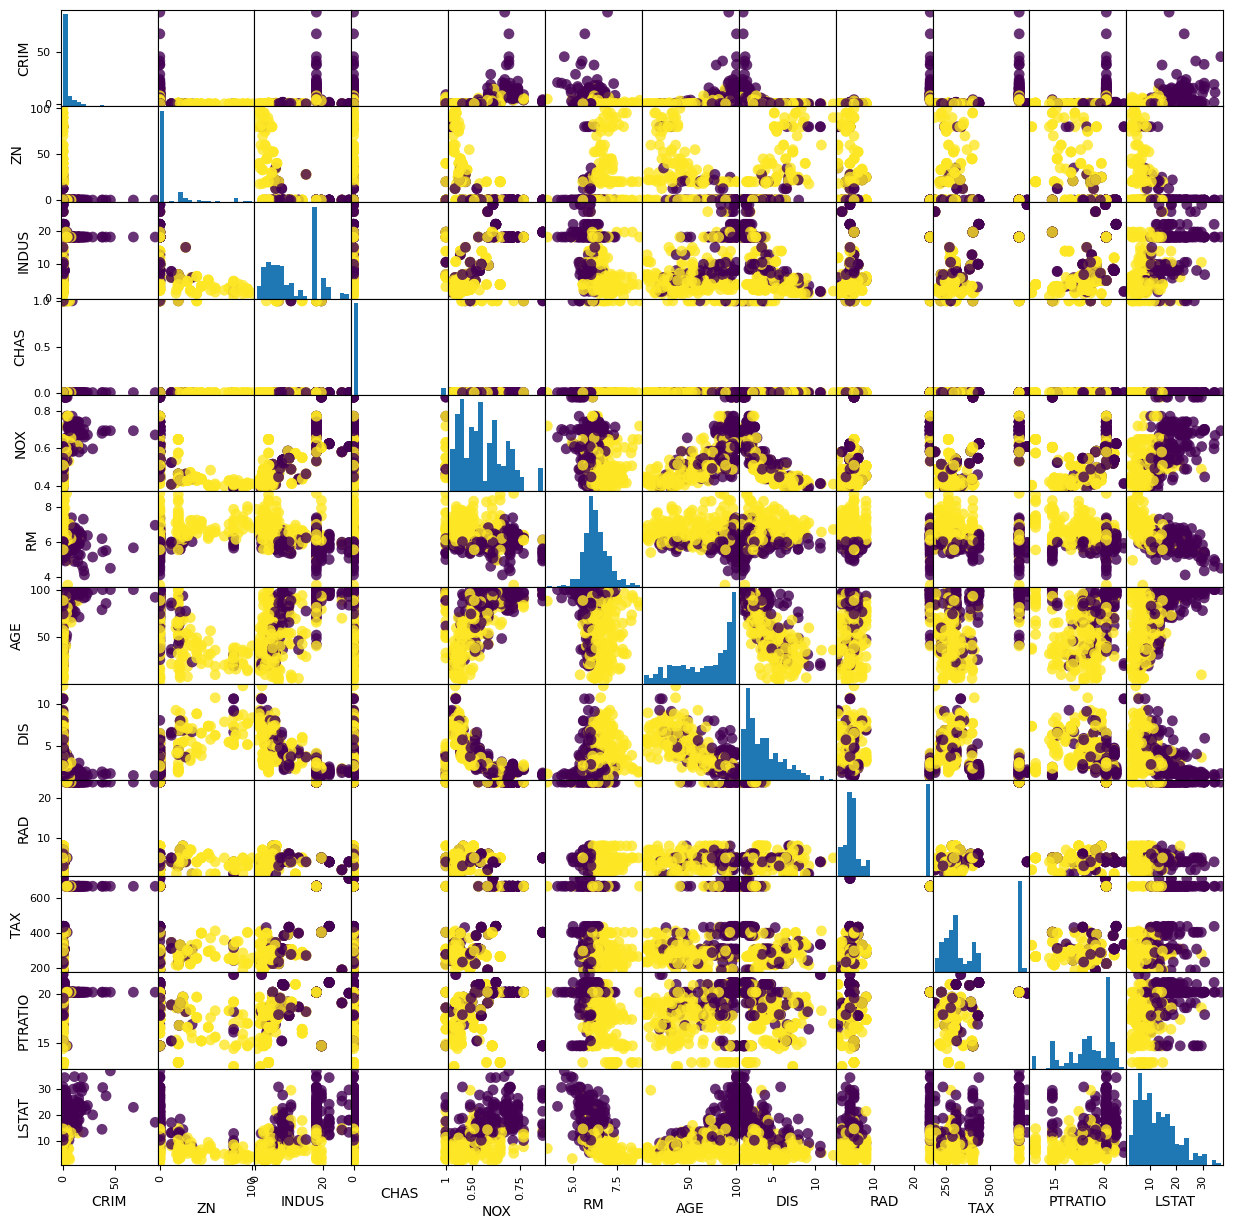

In [10]:
# Create dataframe
data_df = pd.DataFrame(X_train, columns=data['data'].columns.to_list())
# Create scatter plot and color by class label.
%matplotlib inline
import matplotlib.pyplot as plt
_=pd.plotting.scatter_matrix(data_df, c=c_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

# Exercise set 1

### Model learning
* Learn a decision tree using the training data and evaluate its performance on both the training data and the test data. Generate random training/test partitions or varying sizes and analyze how the accuracy results vary (consult the documentation for `train_test_split(.)`).

In [ ]:
## Building and fitting a tree with the training data. Random_state set for repeatability
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0) # With standard setting
tree.fit(X_train, c_train)

DecisionTreeClassifier(random_state=0)

In [12]:
## Calculating the accurancy on the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, c_train)))

Accuracy on training set: 1.000


The accurancy on the training set is 100%

In [11]:
## Calculating the accurancy on the test set
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, c_test)))

Accuracy on test set: 0.780


The accurancy on the test set is 78%

### Model analysis

* Display the decision tree learned using the training data.
* What are the most important features as determined by the learned tree and does, e.g., the choice of top node seem reasonable to you based on your knowledge of the data domain?
* How does the features deemed *most important* by the decision tree learner match the generated tree and your understanding of the domain?

### Model complexity
* Try controlling the complexity of the learned decision tree by adjusting the parameters max\_depth, min\_samples\_split, min\_samples\_leaf
* Investigate the effect when changing these parameters:
    - Visualize (some of) the trees
    - Evaluate the performance of the models on both the training data and the test data
* By designating a part of the data as *validation data*, try to automatically find good values for the parameters controlling the size of the tree. How does the obtained parameters match your manual investigation?
* Instead of using a validation set, try to find good parameter values using cross-validation. How does the results compare to those that you found above?

# Exercise set 2

In this exercise we shall expore and compare the k-nearest neighbor classifier and the naive Bayes model.

### K-nearest neighbor
* Classify the instances in the test set using default settings for the k-NN classifier.
* Try experimenting with different values for 'k'. How do the values affect the classification results? Feel free to try to automate this process using the methods explored in the previous exercise sheet. 
* Try to get some more insight into the data by generating descriptive statistics and by plotting the data. 
* Based on your understanding of the data and the properties of the k-NN classifier, does it seem reasonable to try to manipulate the data (e.g. through normalization) or work with different distance metrics in order to improve the performance of the classifier? How does such changes affect classification accuracy?

### Naive Bayes

* Classify the instances in the test set using the naive Bayes model.
* The naive Bayes classifier makes the strong assumption that the attributes are conditionally independent given the class variable. Can you identify any pairs of attributes that do not adhere to this assumption, and how does it affect the performance of the classifier if one of the attributes are removed?

### Model comparison

* Using the results obtained above, classify the instances in the test set using the k-NN classifier, the naive Bayes classifier, and decision trees.
* Based on your intuitive understanding of the classifiers, can you explain their relative performance? 